In [1]:
from tools.base import *
from tools.ddmtd import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import sleep 
from copy import deepcopy
%load_ext autoreload
%autoreload 2

In [2]:
#Generate column names
NUM_WORDS = 32
column_names = []
for i in range(1,NUM_WORDS+1):
    column_names.append(f"edge{i}")
    column_names.append(f"ddmtd{i}")
    
pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

In [3]:
server="trenz_fpga"
rpi_server="trenz_pi"

In [4]:
def get_data(step,channel =5,folder="",aq_iter = 100):
    data_folder = f"data_files/{folder}/c{channel}_data_step_{str(step).zfill(3)}/"
    !mkdir -p {data_folder}
    !../acq_software/run_atPi.sh ../acq_software/ {step} {channel} {rpi_server}
    !../acq_software/run_atTrenz.sh ../acq_software/ {aq_iter} {server}
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd1.txt ./{data_folder}/ddmtd1.txt
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd2.txt ./{data_folder}/ddmtd2.txt
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd3.txt ./{data_folder}/ddmtd3.txt
        

def plot_data(step=0,channel =10,folder="",freq=160*10**6,data_stream = (1,3),draw=False):   
    df = data2df(step
             ,channel=channel
             ,folder=folder
             ,freq = freq
             ,data_stream = data_stream
            )
#     popt,p_err = df.drawTIE(save_name='',bns=None,fit=True, sep="TIE_FALL")
    popt,p_err = df.drawTIE(save_name='',bns=None,fit=True, sep="",draw=draw)
    


    return (popt[1]*1000,p_err[1]*1000)
    
    

def plot_tie(tie):
    f,ax = plt.subplots(figsize=(8,6))
    
    ax.errorbar(tie[0],tie[1],yerr=tie[2],fmt='o',
#                         color='red',
                        capsize=5,
                        ecolor='black'
                        ,label=f'ODD'
                       )
#     ax.errorbar(tie[0],tie[3],yerr=tie[4],fmt='o',
# #                         color='red',
#                         capsize=5,
#                         ecolor='black'
#                         ,label=f'EVEN'
#                        )
    plt.xlabel("Delay cell index", fontsize=15)
    plt.ylabel("TIE [ps] staggered", fontsize=15)
    plt.legend(loc="upper right")
    plt.gca().grid()
    
def data2df(step=0,channel =5,folder="",freq=160*10**6, data_stream = (1,3)):
    data_folder = f"data_files/{folder}/c{channel}_data_step_{str(step).zfill(3)}/"
    dv1= pd.read_csv(f"{data_folder}/ddmtd1.txt",sep=",",header=0 ,skiprows=0,names=column_names[0:16])
    dv2= pd.read_csv(f"{data_folder}/ddmtd2.txt",sep=",",header=0 ,skiprows=0,names=column_names[16:32])
    dv3= pd.read_csv(f"{data_folder}/ddmtd3.txt",sep=",",header=0 ,skiprows=0,names=column_names[32:48])
    dv = pd.concat((dv1,dv2,dv3),axis=1)  
#     dv = dv1
#     df = deepcopy(dv[(dv.T != 0).any()])
#     df = df.reset_index(drop=1)
    df = deepcopy(dv)
#     return df 
#     df = df[df.ddmtd3!=2147483647].reset_index(drop=1).drop([0,1,2])    
#     df.iloc[0,:]=0
#     return df
    data = ddmtd(deepcopy(df),q=1,channel=data_stream)
    data.N=100000
    data.INPUT_FREQ = freq
    data.Recalc()
    return data 

def config_dcps(step,channel):
    !../acq_software/run_atPi.sh ../acq_software/ {step} {channel} {rpi_server}


    
def get_data_debug(step,channel =5,folder="",aq_iter = 100,sleep_time=20000):
    data_folder = f"data_files/{folder}/c{channel}_data_step_{str(step).zfill(3)}/"
    !mkdir -p {data_folder}
    !../acq_software/run_atTrenz.sh ../acq_software/ {aq_iter} {server} {sleep_time}
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd1.txt ./{data_folder}/ddmtd1.txt
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd2.txt ./{data_folder}/ddmtd2.txt
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd3.txt ./{data_folder}/ddmtd3.txt

In [33]:
freq=160
# !../RPi/config_pll.sh {rpi_server} ../RPi/ 2021_07_20_Dispersion/OCXO/Si5344H-RevD-Registers_{freq}M.h 2021_06_dispersion_conf/pll/Si5344H-RevD-Registers_{freq}M.h
# !../RPi/config_pll.sh {rpi_server} ../RPi/ 2021_07_20_Dispersion/OCXO/Si5344H-RevD-Registers_{freq}M.h 2021_07_20_Dispersion/PLL/Si5344H-RevD-Registers_{freq}M.h


!../RPi/config_pll.sh {rpi_server} ../RPi/ 2021_07_20_Dispersion/OCXO/Si5344H-RevD-Registers_{freq}M.h 2021_08_09_Si5344H/PLL/Si5344H-RevD-Registers_{freq}M.h






We are in dir::/home/pi/Flash_Firmware
Done Compiling PLLs

TBUFF[2] = 60

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 60
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   

TBUFF[2] = 47

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 47
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   


In [8]:
freq=160
folder_name = f"2021_08_06_{freq}MHz"



In [34]:
get_data_debug(0,channel=5,folder=folder_name,aq_iter=500)

loading firmware: 2021_08_09_24channel_v2.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
    42538891 100%    8.66MB/s    0:00:04 (xfer#1, to-check=0/1)

sent 45692 bytes  received 42549386 bytes  5011185.65 bytes/sec
total size is 42538891  speedup is 1.00
receiving file list ... 
1 file to consider
ddmtd2.txt
    46325032 100%    8.45MB/s    0:00:05 (xfer#1, to-check=0/1)

sent 47715 bytes  received 46336447 bytes  6184554.93 bytes/sec
total size is 46325032  speedup is 1.00
receiving file list ... 
1 file to consider
ddmtd3.txt
    46324941 100%    8.36MB/s    0:00:05 (xfer#1, to-check=0/1)

sent 47715 bytes  received 46336356 bytes  6184542.80 bytes/sec
total size is 46324941  speedup is 1.00


In [9]:
def data_pd(step=0,channel =10,folder="",):
    data_folder = f"data_files/{folder}/c{channel}_data_step_{str(step).zfill(3)}/"
    dv1= pd.read_csv(f"{data_folder}/ddmtd1.txt",sep=",",header=0 ,skiprows=0,names=column_names[0:16])
    dv2= pd.read_csv(f"{data_folder}/ddmtd2.txt",sep=",",header=0 ,skiprows=0,names=column_names[16:32])
    dv3= pd.read_csv(f"{data_folder}/ddmtd3.txt",sep=",",header=0 ,skiprows=0,names=column_names[32:48])
    dv = pd.concat((dv1,dv2,dv3),axis=1)
    return dv 


def plot_channel(dv,channel=1):
    data = ddmtd(dv,q=1,channel=(channel,1))
    data.N=100000
    data.Recalc()
    df = data
#     return df
    popt,p_err = df.drawTIE(save_name=f"{figures_folder}/channel_{channel}.jpg",bns=None,fit=True, sep="",draw=True)
    print(f"figure saved as {figures_folder}/channel_{channel}.jpg")
    plt.close()
    return popt,p_err
    
    
    

In [10]:
figures_folder="./figures/2021_08_09_24Ch_DDMTD"
!mkdir -p {figures_folder}

dv = data_pd(folder=folder_name,channel=5)

In [11]:
dv

,edge1,ddmtd1,edge2,ddmtd2,edge3,ddmtd3,edge4,ddmtd4,edge5,ddmtd5,edge6,ddmtd6,edge7,ddmtd7,edge8,ddmtd8,edge9,ddmtd9,edge10,ddmtd10,edge11,ddmtd11,edge12,ddmtd12,edge13,ddmtd13,edge14,ddmtd14,edge15,ddmtd15,edge16,ddmtd16,edge17,ddmtd17,edge18,ddmtd18,edge19,ddmtd19,edge20,ddmtd20,edge21,ddmtd21,edge22,ddmtd22,edge23,ddmtd23,edge24,ddmtd24
0,0,17144,0,0,0,14134,1,12085,0,9698,1,7417,0,7147,1,5937,0,4902,1,3815,0,2922,1,2490,0,14758,1,12893,0,12028,1,11126,0,8207,1,7391,0,5694,1,6110,0,2427,1,2847,0,172,1,1636
1,0,17144,0,0,0,14134,1,12085,0,9698,1,7417,0,7147,1,5937,0,4902,1,3815,0,2922,1,2490,0,14758,1,12893,0,12028,1,11126,0,8207,1,7391,0,5694,1,6110,0,2427,1,2847,0,172,1,1636
2,0,17144,0,0,0,14134,1,12085,0,9698,1,7417,0,7147,1,5937,0,4902,1,3815,0,2922,1,2490,0,14758,1,12893,0,12028,1,11126,0,8207,1,7391,0,5694,1,6110,0,2427,1,2847,0,172,1,1636
3,1,17147,0,0,1,14135,0,12086,1,9700,0,7421,1,7148,0,56521,1,4904,0,3816,1,52689,0,2492,1,14760,0,62924,1,61754,0,11130,1,8211,0,7392,1,5695,0,6113,1,2442,0,53348,1,176,0,1637
4,0,17151,0,0,0,14140,1,12102,0,9721,1,7424,0,7153,1,56525,0,4910,1,3818,0,52690,1,2496,0,14768,1,62925,0,61757,1,11134,0,8212,1,7399,0,5704,1,6114,0,2443,1,53350,0,184,1,1647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,0,260017229,0,0,0,260014221,0,260061975,1,260059429,0,260057771,1,260057031,0,260056562,1,260054894,0,260054148,1,260052759,0,260053044,0,260014815,0,260062963,1,260061817,0,260061413,1,260057988,0,260057889,1,260055658,0,260056464,1,260052192,0,260053401,1,260050213,0,260052032
499995,0,260017229,0,0,0,260014221,0,260061975,1,260059429,0,260057771,1,260057031,0,260056562,1,260054894,0,260054148,1,260052759,0,260053044,0,260014815,0,260062963,1,260061817,0,260061413,1,260057988,0,260057889,1,260055658,0,260056464,1,260052192,0,260053401,1,260050213,0,260052032
499996,0,260017229,0,0,0,260014221,0,260061975,1,260059429,0,260057771,1,260057031,0,260056562,1,260054894,0,260054148,1,260052759,0,260053044,0,260014815,0,260062963,1,260061817,0,260061413,1,260057988,0,260057889,1,260055658,0,260056464,1,260052192,0,260053401,1,260050213,0,260052032
499997,0,260017229,0,0,0,260014221,0,260061975,1,260059429,0,260057771,1,260057031,0,260056562,1,260054894,0,260054148,1,260052759,0,260053044,0,260014815,0,260062963,1,260061817,0,260061413,1,260057988,0,260057889,1,260055658,0,260056464,1,260052192,0,260053401,1,260050213,0,260052032


In [12]:
df = plot_channel(dv,3)



True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_3.jpg


In [13]:
data = []
for i in range(2,25):
    try:
        data.append((i,plot_channel(dv,i)))
    except:
        print(f"{i}th channel failed")

2th channel failed
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_3.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_4.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_5.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_6.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_7.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_8.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_9.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_10.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_11.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_12.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_13.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_14.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_15.jpg
True
figure saved as ./figures/2021_08_09_24Ch_DDMTD/channel_16.jpg
True
figure saved as ./figures/2021_

In [14]:
data

[(3,
  (array([ 1.06758127e+02,  6.07827969e+00, -5.99985713e-04]),
   array([1.87686701e+00, 1.21756042e-05, 1.22050036e-05]))),
 (4,
  (array([ 1.29019542e+02,  2.82348270e+00, -5.00591423e-04]),
   array([2.38217374e+00, 1.06694413e-05, 1.06911970e-05]))),
 (5,
  (array([1.09288054e+02, 5.79384653e+00, 5.84311370e-04]),
   array([1.89199555e+00, 1.16780155e-05, 1.16974680e-05]))),
 (6,
  (array([ 1.26561943e+02,  2.54553496e+00, -5.11890473e-04]),
   array([1.82153889e+00, 8.50163916e-06, 8.54065186e-06]))),
 (7,
  (array([ 1.06923637e+02,  5.63928594e+00, -5.99595537e-04]),
   array([1.86527750e+00, 1.20744064e-05, 1.20964339e-05]))),
 (8,
  (array([ 1.11883991e+02,  2.46153881e+00, -5.82147524e-04]),
   array([1.97321365e+00, 1.18481332e-05, 1.19032274e-05]))),
 (9,
  (array([1.01519136e+02, 5.50222982e+00, 6.30360492e-04]),
   array([1.67515871e+00, 1.20042320e-05, 1.20667903e-05]))),
 (10,
  (array([1.23133021e+02, 2.31991681e+00, 5.22309446e-04]),
   array([2.34273652e+00, 1.14

In [15]:
import matplotlib
matplotlib.style.use(['seaborn-dark','science'])
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 200

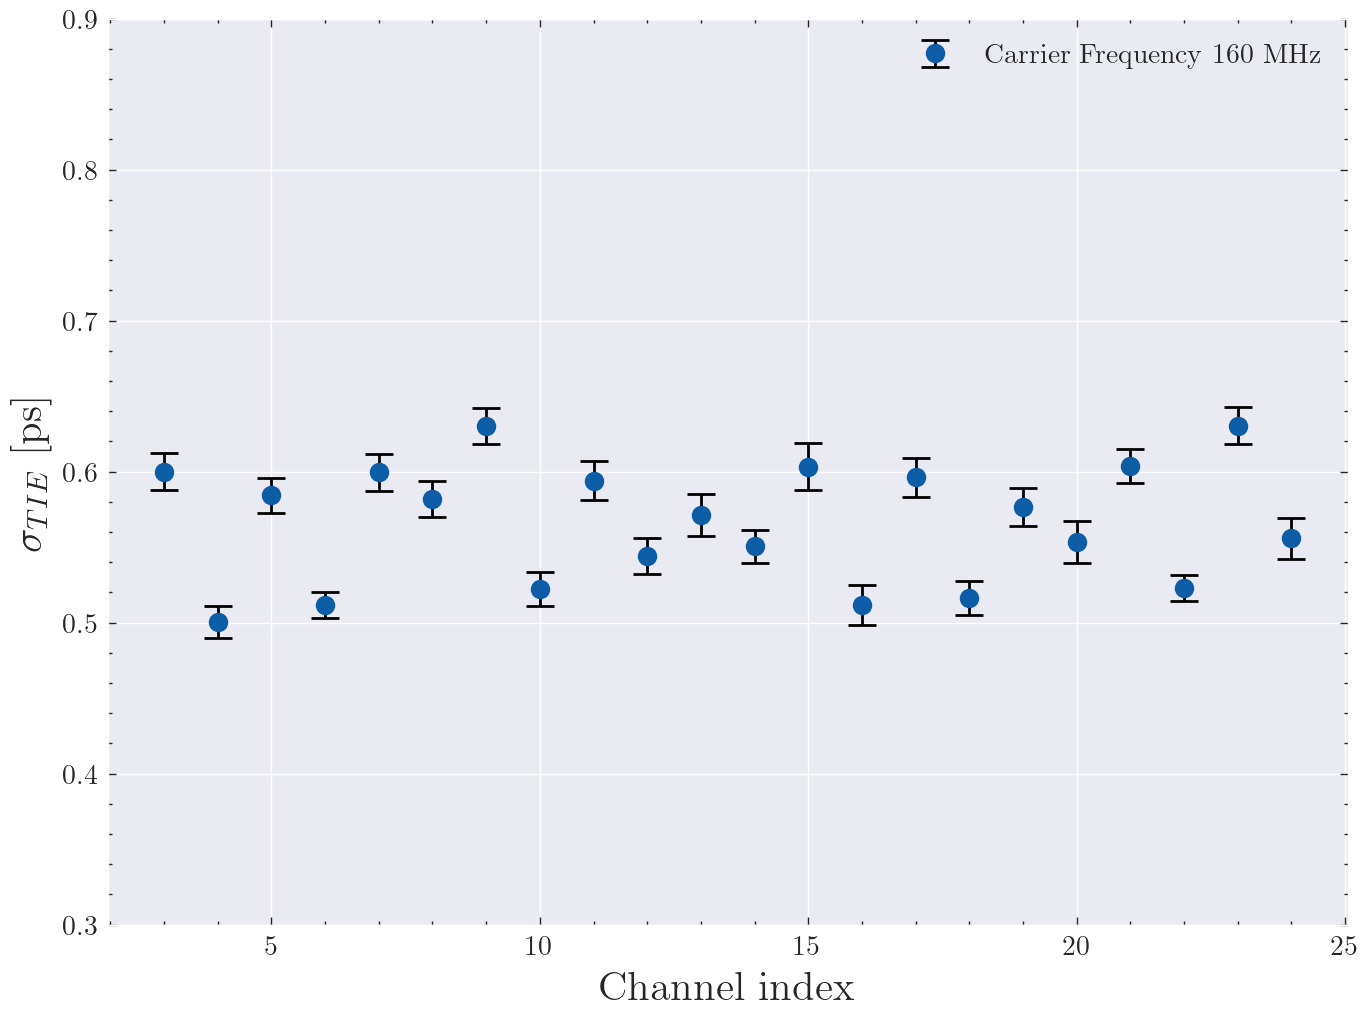

In [16]:
f,ax = plt.subplots(figsize=(8,6))

X = []
Y = []
Y_err = []
for dat in data:
    X.append(dat[0])
    Y.append(dat[1][0][2])
    Y_err.append(dat[1][1][2])

ax.errorbar(X,np.abs(Y)*1000,yerr=np.asarray(Y_err)*1000,fmt='o',
#                         color='red',
                        capsize=5,
                        ecolor='black'
                        ,label=f'Carrier Frequency {160} MHz '
                       )
ax.set_xlabel("Channel index", fontsize=15)
ax.set_ylabel("$\sigma_{TIE}$ [ps] ", fontsize=15)
ax.set_ylim(0.3,0.9)
ax.grid()
ax.legend(loc='upper right')

No handles with labels found to put in legend.


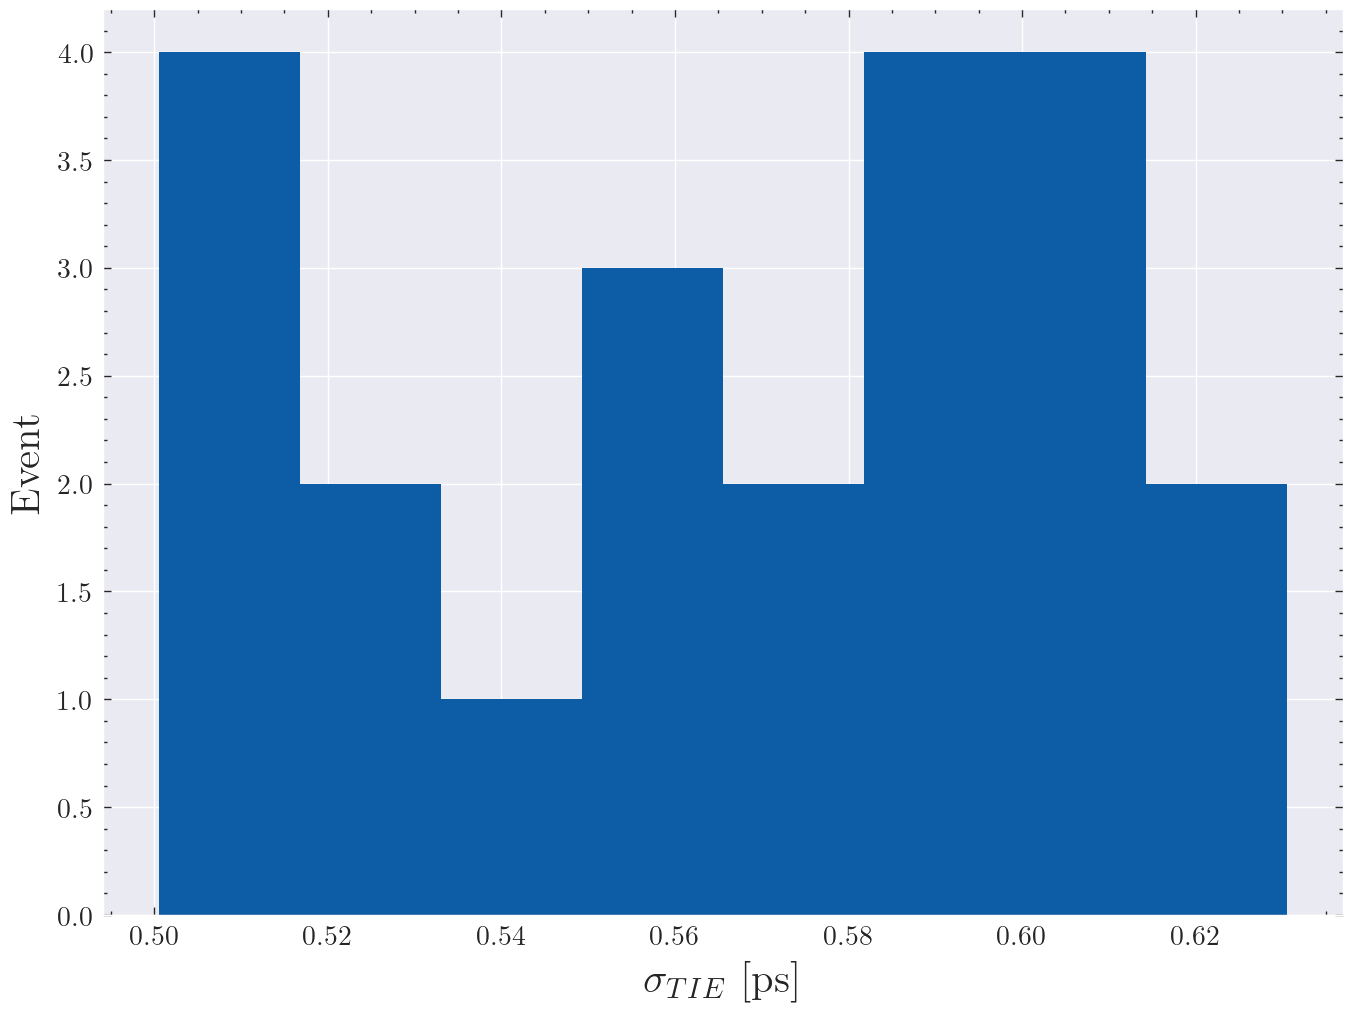

In [32]:
f,ax = plt.subplots(figsize=(8,6))

X = []
Y = []
Y_err = []
for dat in data:
    X.append(dat[0])
    Y.append(dat[1][0][2])
    Y_err.append(dat[1][1][2])

ax.hist(np.abs(Y)*1000,bins=8
                       )
ax.set_ylabel("Event", fontsize=15)
ax.set_xlabel("$\sigma_{TIE}$ [ps] ", fontsize=15)
# ax.set_ylim(0.3,0.9)
ax.grid()
ax.legend(loc='upper right')

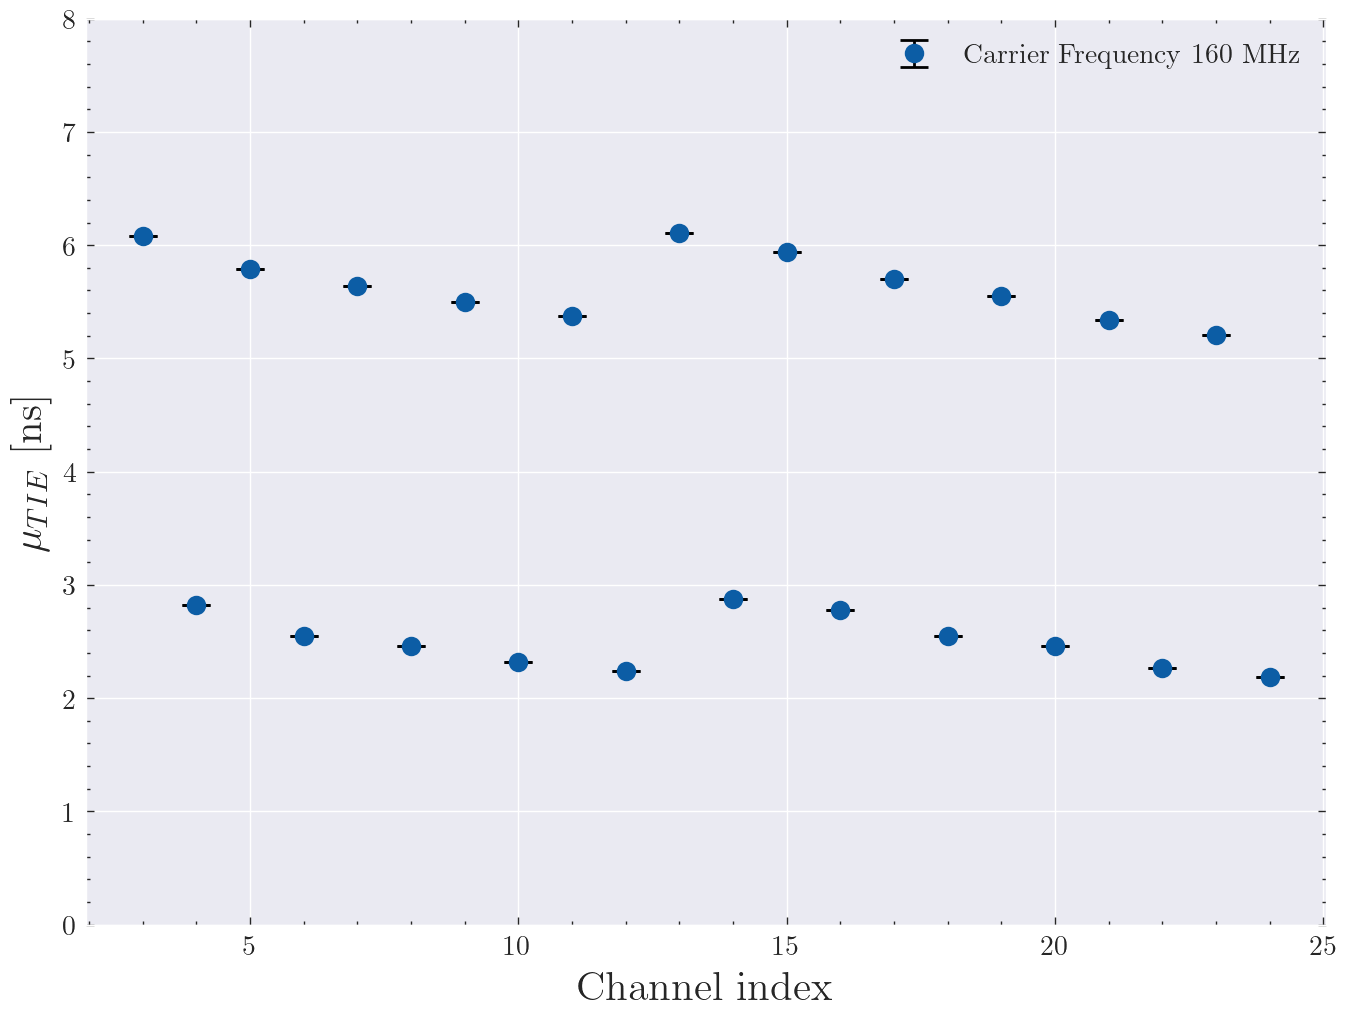

In [81]:
f,ax = plt.subplots(figsize=(8,6))

X = []
Y = []
Y_err = []
for dat in data:
    X.append(dat[0])
    Y.append(dat[1][0][1])
    Y_err.append(dat[1][1][1])

ax.errorbar(X,np.abs(Y),yerr=np.asarray(Y_err),fmt='o',
#                         color='red',
                        capsize=5,
                        ecolor='black'
                        ,label=f'Carrier Frequency {160} MHz '
                       )
ax.set_xlabel("Channel index", fontsize=15)
ax.set_ylabel("$\mu_{TIE}$ [ns] ", fontsize=15)
ax.set_ylim(0,8)
ax.grid()
ax.legend(loc='upper right')